<a href="https://colab.research.google.com/github/AI-Enthusiast/18650-Accelerated-Battery-Life-Testing/blob/main/regular_batteries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [ ]:
import os

# List files in a directory to find your CSV
os.listdir('/content/drive/My Drive/')


['Aryan Bhardwaj.docx',
 'Resume_Template_(1) (1).docx',
 'Untitled document (9).gdoc',
 'passport for prodigy.jpg',
 'visa (1).pdf',
 'visa.pdf',
 'I20 scan.pdf',
 'Untitled document (8).gdoc',
 'Resume_Template_(1).docx',
 'Copy of Job Internship Search Organizer.gsheet',
 'ASA Available Positions F22.pdf',
 'ASA Available Positions F22 (1).gdoc',
 'Untitled document (7).gdoc',
 'ASA Available Positions F22.gdoc',
 'Untitled spreadsheet (2).gsheet',
 'Untitled document (6).gdoc',
 'linkedin learning uses - Sheet1 (1).pdf',
 'linkedin learning uses - Sheet1.pdf',
 'linkedin learning uses - Sheet1 (1).gdoc',
 'linkedin learning uses - Sheet1.gdoc',
 'WITS YT INTERNAL MEMO 1.gdoc',
 'Housing First Solution.gdoc',
 'Impact BMC PUBLIC SECTOR .gdoc',
 'MITO FINAL.gdoc',
 'Untitled document (5).gdoc',
 'Untitled document (4).gdoc',
 'Pace Grade calculator.xlsx',
 'Fred Meyer Marketing Project',
 'p.316, _4.xlsx',
 'yellow_tripdata.csv',
 'DATA ENGINEERING ASSIGNMENT.gdoc',
 'Copy of Budget 

In [2]:
# Direct download link
#file_path = '/content/drive/My Drive/regular.csv'
file_path = 'regular.csv'


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
regular = pd.read_csv(file_path)

# Display the first few rows of the dataset
regular.head()

,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode
0,0,1,6.993291,25.916404,2.519990,3503.232,1
1,1,2,6.448755,64.757509,16.253802,538.454,1
2,2,3,6.474374,67.185977,16.246017,540.349,1
3,3,4,6.472878,67.642913,16.249888,539.218,1
4,4,5,6.353341,70.845676,17.602098,494.909,1


In [26]:
# Read a sample of the file to check its format
sample_df = pd.read_csv(file_path, nrows=10)
print(sample_df)


   Unnamed: 0  dischargePhase  voltage_charger  temperature_battery  \
0           0               1         6.993291            25.916404   
1           1               2         6.448755            64.757509   
2           2               3         6.474374            67.185977   
3           3               4         6.472878            67.642913   
4           4               5         6.353341            70.845676   
5           5               6         6.449268            67.603064   
6           6               7         6.462300            68.628191   
7           7               8         6.457598            68.522298   
8           8               9         6.454356            68.758478   
9           9              10         6.450153            68.723021   

   current_load  time_end  mode  
0      2.519990  3503.232     1  
1     16.253802   538.454     1  
2     16.246017   540.349     1  
3     16.249888   539.218     1  
4     17.602098   494.909     1  
5     16.26167

In [27]:
# Check the columns and data types
regular.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           3826 non-null   int64  
 1   dischargePhase       3826 non-null   int64  
 2   voltage_charger      3826 non-null   float64
 3   temperature_battery  3826 non-null   float64
 4   current_load         3826 non-null   float64
 5   time_end             3826 non-null   float64
 6   mode                 3826 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 209.4 KB


In [28]:
# Check for missing values
regular.isnull().sum()

Unnamed: 0             0
dischargePhase         0
voltage_charger        0
temperature_battery    0
current_load           0
time_end               0
mode                   0
dtype: int64

297.14s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


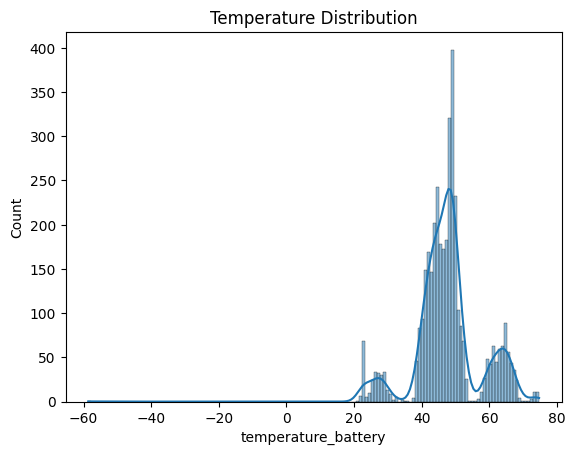

In [29]:
%pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of temperature
sns.histplot(regular['temperature_battery'], kde=True)
plt.title('Temperature Distribution')
plt.show()



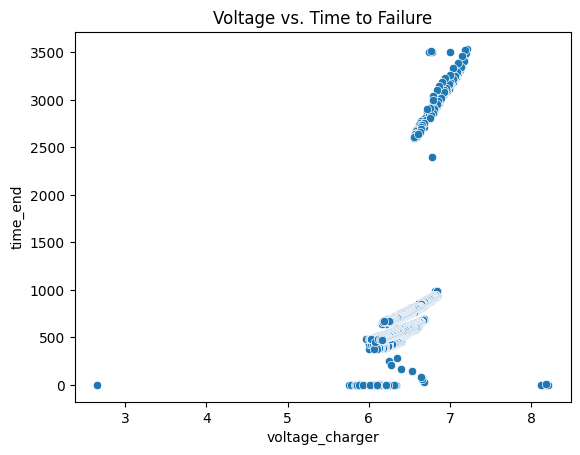

In [30]:
# Example: Relationship between voltage and time to failure
sns.scatterplot(x='voltage_charger', y='time_end', data=regular)
plt.title('Voltage vs. Time to Failure')
plt.show()

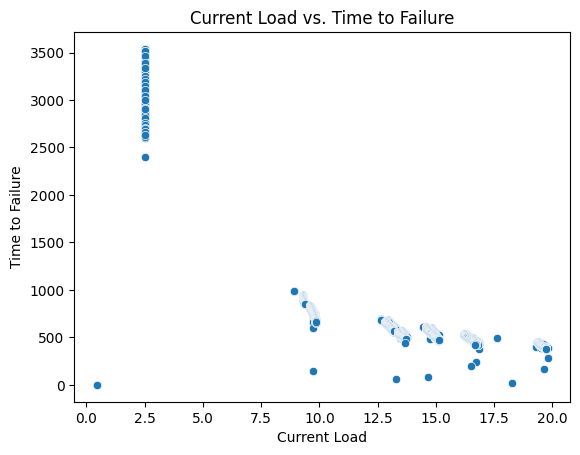

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Relationship between current_load and time_end (Time to Failure)
sns.scatterplot(x='current_load', y='time_end', data=regular)
plt.title('Current Load vs. Time to Failure')
plt.xlabel('Current Load')
plt.ylabel('Time to Failure')
plt.show()


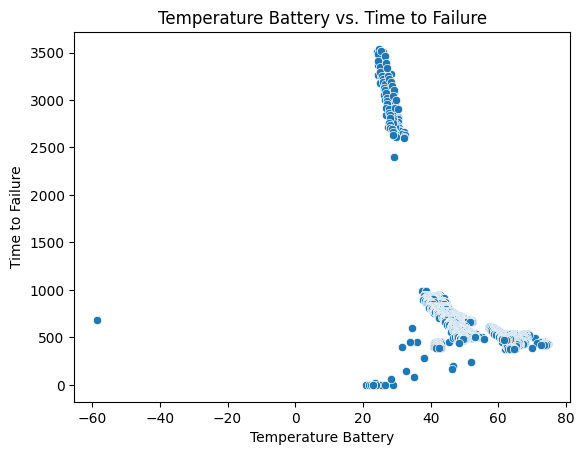

In [32]:
# Plot: Relationship between temperature_battery and time_end (Time to Failure)
sns.scatterplot(x='temperature_battery', y='time_end', data=regular)
plt.title('Temperature Battery vs. Time to Failure')
plt.xlabel('Temperature Battery')
plt.ylabel('Time to Failure')
plt.show()


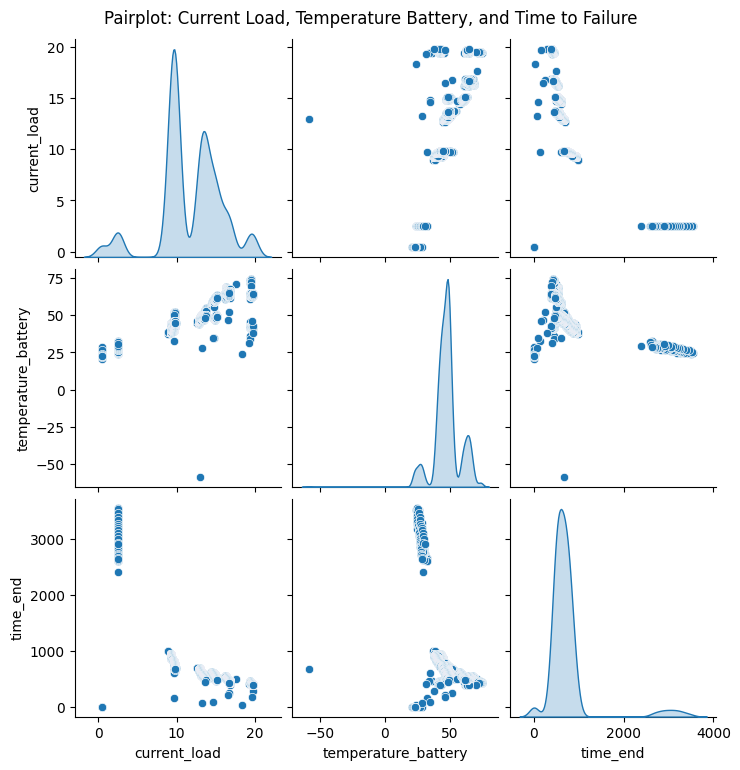

In [33]:
# Pairplot to visualize relationships between multiple variables
sns.pairplot(regular[['current_load', 'temperature_battery', 'time_end']], diag_kind='kde')
plt.suptitle('Pairplot: Current Load, Temperature Battery, and Time to Failure', y=1.02)
plt.show()


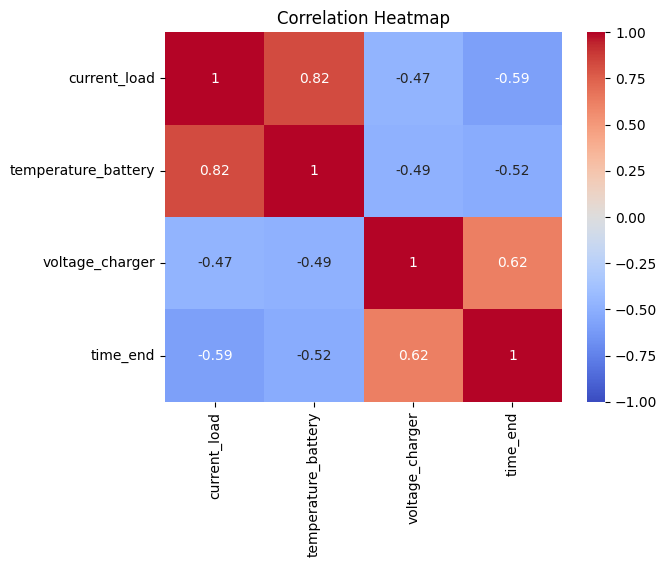

In [34]:
# Correlation heatmap including voltage_charger
corr = regular[['current_load', 'temperature_battery','voltage_charger', 'time_end']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


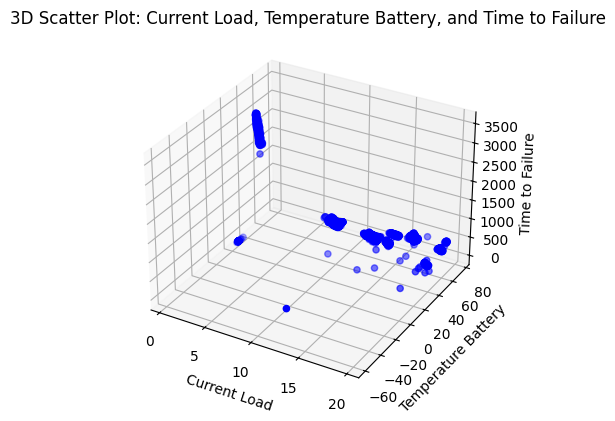

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot: Current Load, Temperature Battery, and Time to Failure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(regular['current_load'], regular['temperature_battery'], regular['time_end'], c='blue', marker='o')
ax.set_xlabel('Current Load')
ax.set_ylabel('Temperature Battery')
ax.set_zlabel('Time to Failure')
plt.title('3D Scatter Plot: Current Load, Temperature Battery, and Time to Failure')
plt.show()


In [36]:
import plotly.graph_objs as go
import plotly.express as px

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    regular,
    x='current_load',
    y='temperature_battery',
    z='time_end',
    color='voltage_charger',  # Optional: to add color based on another variable
    labels={'current_load': 'Current Load',
            'temperature_battery': 'Temperature Battery',
            'time_end': 'Time to Failure'},
    title='3D Scatter Plot: Current Load, Temperature Battery, and Time to Failure'
)

# Update the layout for better visualization
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title='Current Load',
        yaxis_title='Temperature Battery',
        zaxis_title='Time to Failure'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [37]:
import numpy as np

# Add the 'arrhenius_temperature' column
regular['arrhenius_temperature'] = 11605 / (regular['temperature_battery'] + 273.15)

# Add the 'log_voltage' column
regular['log_voltage'] = np.log10(regular['voltage_charger'])

# Display the first few rows of the DataFrame to verify the new columns
regular.head()


,Unnamed: 0,dischargePhase,voltage_charger,temperature_battery,current_load,time_end,mode,arrhenius_temperature,log_voltage
0,0,1,6.993291,25.916404,2.519990,3503.232,1,38.804091,0.844682
1,1,2,6.448755,64.757509,16.253802,538.454,1,34.343717,0.809476
2,2,3,6.474374,67.185977,16.246017,540.349,1,34.098658,0.811198
3,3,4,6.472878,67.642913,16.249888,539.218,1,34.052938,0.811097
4,4,5,6.353341,70.845676,17.602098,494.909,1,33.735889,0.803002


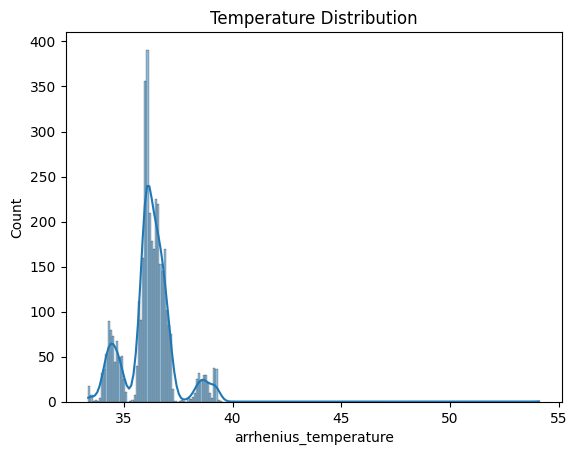

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of temperature
sns.histplot(regular['arrhenius_temperature'], kde=True)
plt.title('Temperature Distribution')
plt.show()




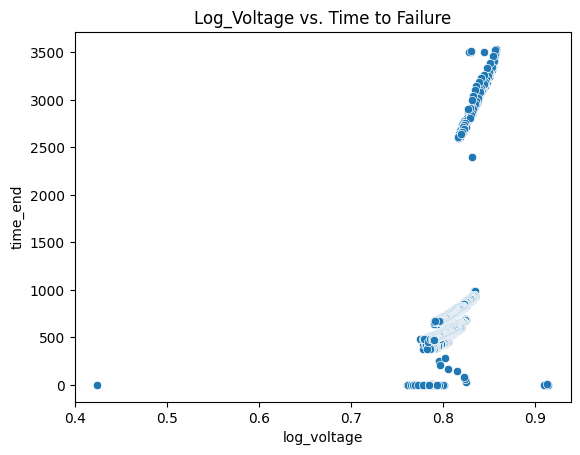

In [39]:
# Example: Relationship between log_voltage and time to failure
sns.scatterplot(x='log_voltage', y='time_end', data=regular)
plt.title('Log_Voltage vs. Time to Failure')
plt.show()

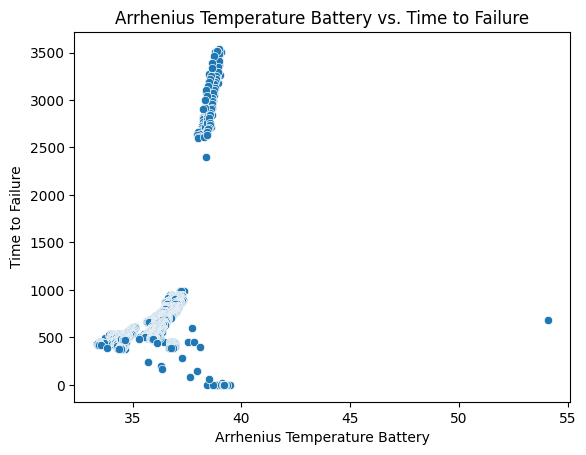

In [40]:
# Plot: Relationship between arrhenius_temperature and time_end (Time to Failure)
sns.scatterplot(x='arrhenius_temperature', y='time_end', data=regular)
plt.title('Arrhenius Temperature Battery vs. Time to Failure')
plt.xlabel('Arrhenius Temperature Battery')
plt.ylabel('Time to Failure')
plt.show()


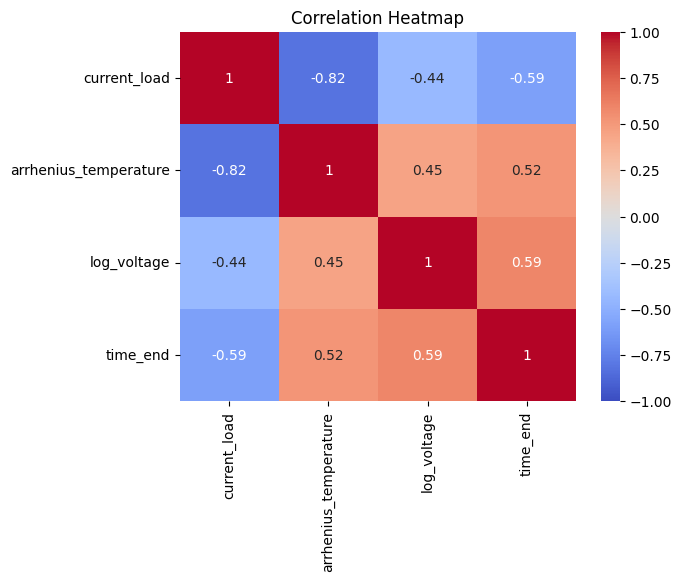

In [41]:
# Correlation heatmap including voltage_charger
corr = regular[['current_load', 'arrhenius_temperature','log_voltage', 'time_end']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [42]:
import plotly.graph_objs as go
import plotly.express as px

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(
    regular,
    x='current_load',
    y='arrhenius_temperature',
    z='time_end',
    color='log_voltage',  # Optional: to add color based on another variable
    labels={'current_load': 'Current Load',
            'arrhenius_temperature': 'Arrhenius Temperature Battery',
            'time_end': 'Time to Failure'},
    title='3D Scatter Plot: Current Load, Arrhenius Temperature Battery, and Time to Failure'
)

# Update the layout for better visualization
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    scene=dict(
        xaxis_title='Current Load',
        yaxis_title='Arrhenius Temperature Battery',
        zaxis_title='Time to Failure'
    ),
    margin=dict(l=0, r=0, b=0, t=50)
)

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [43]:
# Calculate 'temp_volt' as the product of 'arrhenius_temperature' and 10**'log_voltage'
regular['temp_volt'] = regular['arrhenius_temperature'] * regular['log_voltage']

# Check the first few rows to verify
print(regular[['arrhenius_temperature', 'log_voltage', 'temp_volt']].head())


   arrhenius_temperature  log_voltage  temp_volt
0              38.804091     0.844682  32.777102
1              34.343717     0.809476  27.800412
2              34.098658     0.811198  27.660756
3              34.052938     0.811097  27.620251
4              33.735889     0.803002  27.089992


In [44]:
regular = regular[regular['temperature_battery'] > 0]
regular = regular[regular['time_end'] > 10]

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into features and target
X = regular[['arrhenius_temperature', 'log_voltage', 'current_load' , 'temp_volt']]
y = regular['time_end']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
#evaluations
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
rss = np.sum((y_test-y_pred)**2)
k = X_train.shape[1] + 1
aic = n * np.log(rss / n) +2 * k
print(f'Mean Square Error: {mse}')
print(f'AIC Score: {aic}')
print(f'R^2 Score: {r2}')


Mean Square Error: 33084.62801462147
AIC Score: 7804.711208251066
R^2 Score: 0.9098979700916326


In [46]:
y_test

3477    498.115
1149    893.520
362     821.732
2941    431.046
2386    589.379
         ...   
2166    400.084
3469    502.632
627     752.457
1595    740.428
1119    912.211
Name: time_end, Length: 749, dtype: float64

322.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


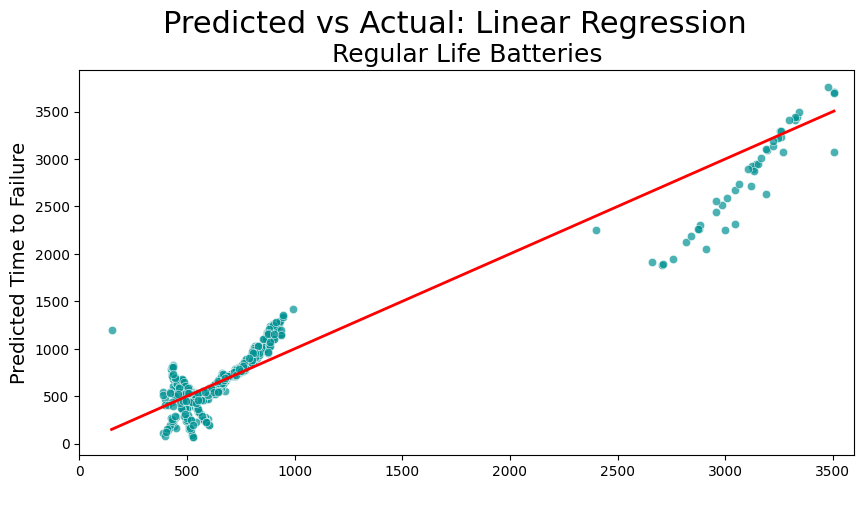

In [47]:
%pip install seaborn
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred, color='#009192',alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# Plot details
plt.xlabel(' ')
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Regular Life Batteries',fontsize = 18)
plt.suptitle('Predicted vs Actual: Linear Regression',fontsize=22,y=1)
plt.xlim(0,3600)

# Show plot
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

#evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
n = len(y_test)
rss = np.sum((y_test-y_pred_rf)**2)
k = X_train.shape[1] + 1
aic_rf = n * np.log(rss / n) +2 * k
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - AIC Score: {aic_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')


Random Forest - Mean Squared Error: 1191.9908123302614
Random Forest - AIC Score: 5315.451724724404
Random Forest - R^2 Score: 0.9967537554970962


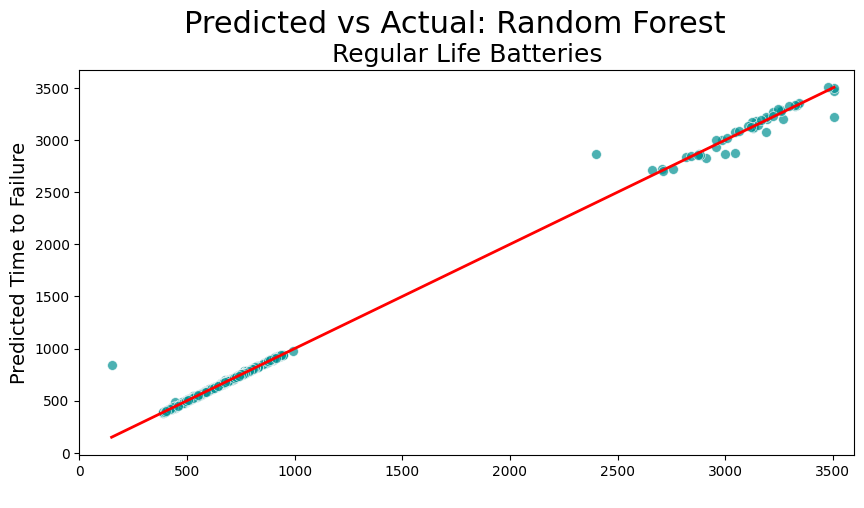

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred_rf, color='#009192',alpha=0.7,s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
# Plot details
plt.xlabel(' ')
plt.ylabel('Predicted Time to Failure',fontsize=14)
plt.title('Regular Life Batteries',fontsize = 18)
plt.suptitle('Predicted vs Actual: Random Forest',fontsize=22,y=1)
plt.xlim(0,3600)

# Show plot
plt.show()

In [50]:
# Define thresholds
threshold_25 = np.percentile(regular['time_end'], 25)
threshold_75 = np.percentile(regular['time_end'], 75)

# Create a new column for battery health status
def classify_battery(time_end):
    if time_end <= threshold_25:
        return 'End of Life'
    elif time_end <= threshold_75:
        return 'Degraded'
    else:
        return 'Healthy'

regular['battery_health'] = regular['time_end'].apply(classify_battery)

# Encoding categorical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
regular['battery_health_encoded'] = le.fit_transform(regular['battery_health'])


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target for classification
X = regular[['arrhenius_temperature', 'log_voltage', 'current_load']]
y = regular['battery_health_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predictions
y_pred_class = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


Accuracy: 0.829105473965287
[[304  60   7]
 [ 44 122   1]
 [ 16   0 195]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       371
           1       0.67      0.73      0.70       167
           2       0.96      0.92      0.94       211

    accuracy                           0.83       749
   macro avg       0.82      0.82      0.82       749
weighted avg       0.83      0.83      0.83       749



In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Select the relevant features and the target variable
X = regular[['arrhenius_temperature', 'log_voltage', 'current_load', 'time_end']]
y = regular['time_end']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Define the FNN model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for predicting time to failure
])


c:\Users\tyler\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 759691.8750 - mae: 706.9995 - val_loss: 285327.4375 - val_mae: 410.6509
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126501.3672 - mae: 263.8896 - val_loss: 27177.1230 - val_mae: 138.9989
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27209.9863 - mae: 134.0216 - val_loss: 17964.9805 - val_mae: 105.5612
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20286.7285 - mae: 108.3495 - val_loss: 12935.9346 - val_mae: 88.3299
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17361.9375 - mae: 98.8262 - val_loss: 9906.9785 - val_mae: 76.8790
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14736.8672 - mae: 92.0282 - val_loss: 8211.1152 - val_mae: 68.5929
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12798.2002 - mae: 84.2919 - val_loss: 6597.5361 - val_mae: 59.8963
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10904.4697 - mae: 75.1442 - val_loss: 5271.0469 - val

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1095.2959 - mae: 21.2464
Test Loss: 919.2492065429688
Test MAE: 20.979955673217773


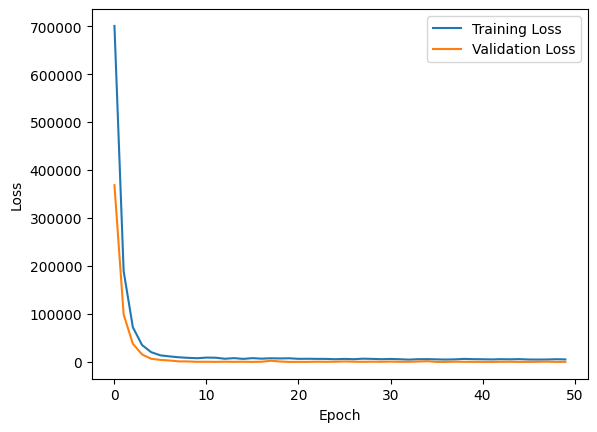

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Display some predictions vs actual values
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Predicted: [447.95148], Actual: 437.0130000000354
Predicted: [481.14905], Actual: 474.820000000007
Predicted: [462.50073], Actual: 452.8970000005793
Predicted: [537.83075], Actual: 534.2390000000596
Predicted: [556.59424], Actual: 551.3699999999953
Predicted: [698.5598], Actual: 686.5760000003502
Predicted: [745.1945], Actual: 727.1409999998286
Predicted: [526.6433], Actual: 523.0219999998808
Predicted: [899.8112], Actual: 876.2539999999572
Predicted: [526.7117], Actual: 519.686999999918
